## Math 157: Intro to Mathematical Software
## UC San Diego, Winter 2018
## Elain Ng

# The Discrete Fast Fourier Transform

The Fourier Transform evolved from Fourier series, which is a representation of a function f(t) with period
2l (f(t+2l)=f(t)) in terms of sines and cosines with the same period:

$$ f(t) = \frac{1}{2}a_0+\sum_{n=1}^{\infty}a_n cos(\frac{n \pi t}{l})+\sum_{n=1}^{\infty}b_n sin(\frac{n \pi t}{l})$$

This equation can be written as:

$$f(t) = \sum_{n=-\infty}^{\infty} c_n exp(\frac{i n \pi t}{l}) $$

where $c_n = 0.5(a_n - b_n)$ for all n with $a_{-n}$ identical to $a_n$ and $b_{-n}$ identical to $-b_n$ such that $b_0=0$.
The $c_n$ can be obtained from f(t) with:

$$c_n = \frac{1}{l}\int_{-l}^{l} f(t) exp(-\frac{i n \pi t}{l}) dt$$

The two preceding equations can be written as:

$$f(t) = \sum_{n=-\infty}^{\infty} (\frac{1}{2l}) F_l(\frac{n}{2l})  exp(\frac{i n \pi t}{l}) $$

where

$$F_l(f) = \frac{1}{l}\int_{-l}^{l} f(t) e^{-2 \pi i f t} df$$, 

respectively. The Fourier transform is obtained by taking the limit of the Fourier series as the period length
2l tends to infinity. In doing this, let $f = \frac{n}{2l}$ and the let the successive differences in f be df. This provides the equations of the Fourier transform (see reference 1):

$$ F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i\omega t}dt $$

and

$$ f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) e^{i\omega t} d\omega$$.

with

$$\omega = 2 \pi f$$

The integral yielding $F(\omega)$ is the Fourier transform of f(t), and that yielding f(t) is the inverse Fourier tansform. The Fourier integral is utilized to analyze non-periodic functions of t from $(-\infty,\infty)$. Fourier transforms, or their discrete form, are useful for signal processing and solving certain ordinary and partial differential equations. This is true because of the very many simple properties of Fourer transforms (see reference 2 below).


Parseval's theorem:

$$ Total \hspace{1mm} power = \int_{-\infty}^{\infty} |f(t)|^2 dt = \int_{-\infty}^{\infty} |F(\omega)|^2 d\omega $$

is easy to derive using the integral representation of the delta function in terms of complex exponentials. 

To implement an FFT in python, a discrete Fourier transform over sampled data must be used.

Let

$$ f_k = f(t_k) = f(k\Delta)$$

where $ \Delta $ is the sampling interval and k = 0, 1, 2, ... , N-1 (N consecutive points).

The Nyquist critical frequency is:

$$ f_c = \frac{1}{2\Delta} $$

The Sampling theorem: If a continuous function f(t) is sampled at a time interval $ \Delta $ and f(t)
is bandwidth limited to frequencies < $ f_c $ , then f(t) is completely determined by its samples $f_k$
given above. If f(t) is not bandwith limited, then all of the power components at frequencies outside of the range
$ -f_c < f < f_c $ are aliased or falsely translated into that range. Discrete Fourier transforms (DFTs) are designed
to be limited to within the range defined by the Nyquist critical frequency. In particular, the python algorithms
in scipy assume a sampling interval of 1 Hz, giving $f_c = 0.5 $ Hz.

For N samples, the DFT esitmates $ F(\omega) $ at the following discrete frequencies:
$$ f_n = \frac{n}{N\Delta}  \hspace{2cm} n = -\frac{N}{2}, ... , \frac{N}{2}. $$
The DFT results for the extreme values
of frequency are identical, and in scipy the output of the frequencies are actually -N/2,...,N/2-1,
but not necessarily in that particular order.

The integral form of the Fourier transform can be approximated by a discrete sum as follows:

$$F(f_n) = \int_{-\infty}^{\infty} f(t) e^{-2 \pi i f_n t}dt \approx \Delta \sum_{k=0}^{N-1} f_k exp({-2 \pi i f_n t_k}) = \Delta \sum_{k=0}^{N-1} f_k exp(\frac{-2 \pi i k n}{N})$$

where $t_k$ and $f_n$ from above have been used. Let

$$F_n = \sum_{k=0}^{N-1} f_k exp(\frac{-2 \pi i k n}{N})$$

be the discrete Fourier transform (DFT) of $f_k$. The inverse discrete Fourier transform (IDFT) is:

$$f_k = \frac{1}{N}\sum_{n=0}^{N-1} F_n exp(\frac{2 \pi i k n}{N})$$

and Parseval's theorem becomes:

$$\sum_{k=0}^{N-1} |f_k|^2 = \frac{1}{N}\sum_{n=0}^{N-1} |F_n|^2 $$

The power spectral density of a tansformed signal is plotted using the input $\frac{1}{N}|F_n|^2$ as a function of frequency.



### References:
1. <u>Fourier Analysis and Generalized Functions</u>, Lighthill, 1970.
2. <u>Numerical Recpes in C++</u>, Press et. al., 2007.
3. <u>Advanced Engineerin Mathematics</u>, Kreyzig, 1999.

## Note

<p>The scipy.fftpack's fft and ifft are sufficient for the exercises below. Although all signals will be real in the exercises, it is better to become accustomed to using fft and ifft, since most literature discusses fft and ifft. Also, please utilize only powers of 2 for the N of the fft and ifft. With that, the best results will be obtained for the problems.</p>

## Example:

In [1]:
import scipy.fftpack as fft
import numpy as np
import matplotlib.pyplot as plt
print('An Example of the use of fft and ifft for cos(t).\n')
print('2 Pi seconds of data sampled at 8 Hz.')
print('The sampling interval is 2pi/8= ', 2.0*np.pi/8.0, ' Hz^-1 and the sampling frequency is 8/2pi = ', 8.0/2.0/np.pi, 'Hz.')

N_ft = 8
sampling_freq = 8.0/2.0/np.pi
Nyquist_freq = sampling_freq/2.0
print('The Nyquist frequency is: ', Nyquist_freq)
t = np.linspace(0.0, 2*np.pi, N_ft, False)
print('The sampling times:')
print(t)
print('')
ft = np.zeros(N_ft)
for i in range(N_ft):
    ft[i]=np.cos(t[i])
print("The samples taken from the signal cos(t):")
print(ft)
print('')

FT = fft.fft(ft, n=N_ft, axis=-1, overwrite_x=False)
print("The DFT output:")
print(FT)
print('')
Freq = fft.fftfreq(8)
print('The sampling frequency is 1Hz by default in python. The actual DFT frequencies are: ')
for j in range(len(Freq)):
    Freq[j] = sampling_freq*Freq[j]
print(Freq)
print('')
print('The data for the PSD is: ')
for k in range(len(Freq)):
    print(Freq[k], ' , ', (1/N_ft)*(FT.real[k]*FT.real[k]+FT.imag[k]*FT.imag[k]))
print('')

IFT = fft.ifft(FT, n=N_ft, axis=-1, overwrite_x=False)
print('The inverse DFT of the FT:')
print(IFT)

An Example of the use of fft and ifft for cos(t).

2 Pi seconds of data sampled at 8 Hz.
The sampling interval is 2pi/8=  0.7853981633974483  Hz^-1 and the sampling frequency is 8/2pi =  1.2732395447351628 Hz.
The Nyquist frequency is:  0.6366197723675814
The sampling times:
[ 0.          0.78539816  1.57079633  2.35619449  3.14159265  3.92699082
  4.71238898  5.49778714]

The samples taken from the signal cos(t):
[  1.00000000e+00   7.07106781e-01   6.12323400e-17  -7.07106781e-01
  -1.00000000e+00  -7.07106781e-01  -1.83697020e-16   7.07106781e-01]

The DFT output:
[ -3.44509285e-16 +0.00000000e+00j   4.00000000e+00 -4.66973965e-16j
   1.22464680e-16 -0.00000000e+00j   0.00000000e+00 +2.28847549e-17j
   9.95799250e-17 +0.00000000e+00j   0.00000000e+00 -2.28847549e-17j
   1.22464680e-16 +0.00000000e+00j   4.00000000e+00 +4.66973965e-16j]

The sampling frequency is 1Hz by default in python. The actual DFT frequencies are: 
[ 0.          0.15915494  0.31830989  0.47746483 -0.63661977 -0

## Observations

<ul style="list-style-type:disc">
                <li style="margin-left: 100px;">When choosing a time interval for a signal obtained from a mathematical formula, the total time sampled should contain at least one full period of the lowest frequency specified by the formula. Always use an N value which is an integer power of 2 in order to avoid zero padding of the input signal.</li>
                <li style="margin-left: 100px;">The ability of the DFT to match an input's signal accurately depends significantly on the sampling rate. Increasing the sampling rate always increases the Nyquist frequency, which narrows the nonzero or high amplitude portion of the PSD plot.</li>
                <li style="margin-left: 100px;">The sampling frequency or number of samples per second must be determined to obtain the correct DFT frequencies. The python DFT default frequencies should be multiplied by the sampling frequency. In the example above, the default DFT frequencies have been corrected.</li>
                <li style="margin-left: 100px;">For a real signal, the imaginary part of the DFT is zero.</li>
                <li style="margin-left: 100px;">N=8. Note that the DFT for the first frequency is the same as that of the fifth, which is the negative of the Nyquist frequency. Also, the  DFT for the same positive and negative frequency is identical.</li>
                <li style="margin-left: 100px;">The PSD, when plotted, should use only <b>positive frequencies</b>. It also should include both 0 Hz and the Nyquist frequency. The contributions for positive frequencies other that 0 Hz or the Nyquist frequency should be doubled.</li>
                <li style="margin-left: 100px;">The inverse DFT returns the real, initial signal exactly along with a zero imaginary part.</li>
                <li style="margin-left: 100px;">It is possible to filter a signal using the DFT and then the IDFT. The unwanted frequencies may be removed from the real, initial signal by nulling the DFT contributions corresponding to the these frequencies, and then performing the inverse DFT with the modified DFT data. Scipy.fftpack will issue a warning if this is done, but the warning can be ignored since the final result provided is correct. (See reference 2 above about filtering with the DFT.)</li>
                
</ul>

# Exercises
Please use scipy.fftpack's fft and ifft for these problems.
### Problem 1: 
Using ecg.txt, do the following:
    a) First plot the signal in ecg.txt. Next, demean the signal.
    b) Find the DFT of the signal and check to see if Parseval's theorem is 
    satisfied.
    c) What is the Nyquist critical frequency? Find the power spectral density 
    (PSD) of the signal and plot it.
    d) Find the frequency of the maximum of the PSD.
    
### Problem 2: 
Using the DFT of the signal in problem 1, filter the signal to remove some of the
very low frequency components and the very high frequency components beyond the non-zero 
portion of the PSD. Replot the filtered ECG signal. You should at least see the removal
of baseline wandering. Try to find roughly optimal low and high frequency cutoffs that preserve
the basic shape of the ecg but remove unwanted characteristics.


### Problem 3: 
Let f(t) = sin(7t)+sin(17t)
Sample the signal and plot the PSD. Interpret the result.


### Problem 1 Solution:

8.192 seconds of data sampled at 1000 Hz.


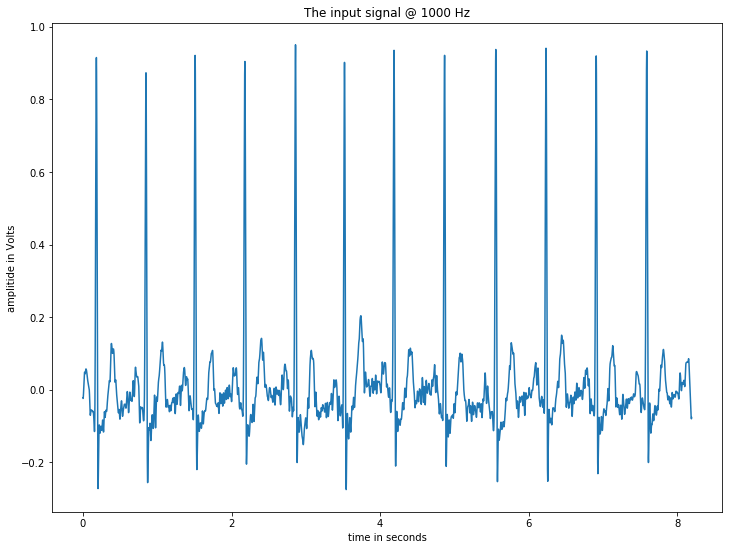

Signal mean after demean:  4.33680868994e-19
Total power obtained from the fft:  180.960020626
Total power obtained from the ecg signal:  180.399174843
This level of agreement is sufficient for the verification of Parseval's Theorem.


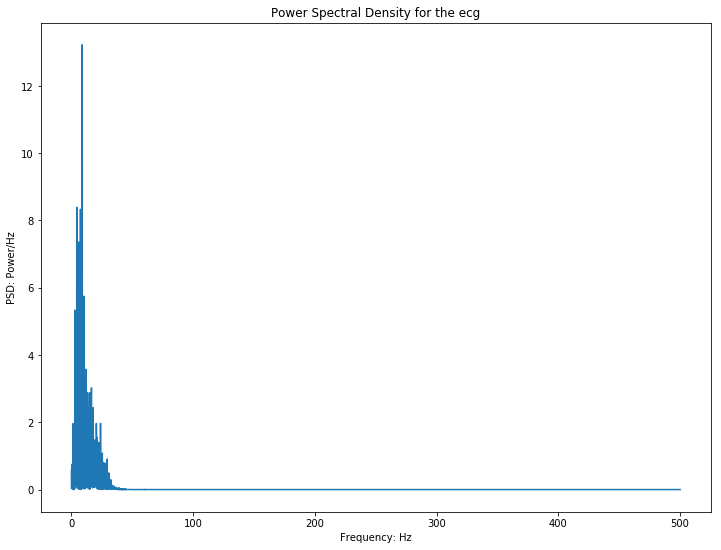

Index and frequency of the max of the PSD:  73 8.9111328125


In [2]:
import scipy.fftpack as fft
import numpy as np
import matplotlib.pyplot as plt

#This makes a larger figure
#------------------------------------------------------------------------------
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#------------------------------------------------------------------------------

###############################################################################
#Problem 1
#Using ecg.txt, do the following:
    #a) First plot the signal in ecg.txt. Next, demean the signal.
    #b) Find the DFT of the signal and check to see if Parseval's theorem is 
    #satisfied.
    #c) What is the Nyquist critical frequency? Find the power spectral density 
    #(PSD) of the signal and plot it.
    #D) Find the frequency of the maximum of the PSD.
    
################################################################################    
#Solution to Problem 1:

#a) Plot the signal in ecg.txt. Next, demean the signal
#Make a copy to preserve the original

#PLOT THE INPUT SIGNAL USED FOR PROBLEMS 1 and 2:
N = 8192
file = open('ecg.txt', 'r') #one point per line
sig = np.zeros(N)
i = 0
for lines in file.readlines():
    sig[i] = lines
    i = i + 1
print('8.192 seconds of data sampled at 1000 Hz.')
tme = np.linspace(0.0, (1.0*N)/1000.0, N, False)

plt.title("The input signal @ 1000 Hz")
plt.plot(tme, sig)
plt.ylabel("amplitide in Volts")
plt.xlabel("time in seconds")
plt.axis('tight')
plt.show()

signew = np.zeros(8192)
for j in range(len(signew)):
    signew[j] = sig[j]

#get the mean of the signal
mean = signew.mean()
#Demean the signal
for k in range(len(sig)):
    signew[k] = signew[k] - mean
mean = signew.mean()
#check the work
print("Signal mean after demean: ", mean)

#b) Find the DFT of the signal and check if Parseval's theorem is valid.
#Compute the sum of the squares of the elements of the signal
sum_squares_signew = 0.0
for ii in range(len(signew)):
    sum_squares_signew = sum_squares_signew + signew[ii]*signew[ii]

dft = fft.fft(sig, n=8192, axis=-1, overwrite_x=False)
freq = fft.fftfreq(8192)
#Note that the python algorithm does not consider the real sampling rate of the
#signal. It always assumes the sampling rate is 1Hz.
#compute 1/N times the sum of the mod squared of each component of the fft
#check if parseval's theorem is valid.
sum_modsquared_dft = 0.0
for kk in range(len(dft.real)):
    sum_modsquared_dft = sum_modsquared_dft + dft.real[kk]*dft.real[kk] + dft.imag[kk]*dft.imag[kk]
sum_modsquared_dft /= N
print('Total power obtained from the fft: ', sum_modsquared_dft)
print('Total power obtained from the ecg signal: ', sum_squares_signew)
print("This level of agreement is sufficient for the verification of Parseval's Theorem.")
#fft 180.960020626
#signal 180.399174843

#c) Plot the power spectral density function and give the Nyquist critical frequency.
M = 4097
sampling_freq = 1000.0
nyquist_freq = sampling_freq/2.0
psd = np.zeros(M)
for jj in range(M):
    if (jj == 0) or (jj == M-1):
        psd[jj] = (dft.real[jj]*dft.real[jj]+dft.imag[jj]*dft.imag[jj])/N
    else:
        psd[jj] = 2.0*(dft.real[jj]*dft.real[jj]+dft.imag[jj]*dft.imag[jj])/N
fpsd = np.zeros(M)
fpsd[0] = sampling_freq*freq[0]
fpsd[M-1] = -sampling_freq*freq[M-1]
for l in range(1,M-1):
    fpsd[l] = sampling_freq*freq[l]
plt.plot(fpsd,psd)
plt.title("Power Spectral Density for the ecg")
plt.ylabel("PSD: Power/Hz")
plt.xlabel("Frequency: Hz")
plt.show()

#d) Find the freq of the max of the PSD:
maxi = 0.0
imaxi = -1
for ll in range(len(psd)):
    if(psd[ll]>maxi):
        maxi = psd[ll]
        imaxi = ll
print("Index and frequency of the max of the PSD: ", imaxi, fpsd[imaxi])
#freq = 8.9111328125 Hz with imaxi = 73

### Problem 2 Solution:

8.192 seconds of data sampled at 1000 Hz.
Note that this can cause a warning to be issued by python, but it does not matter.
A low frequency cutoff of 10.0 Hz and a high frequency cutoff of 33.0 Hz work well.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


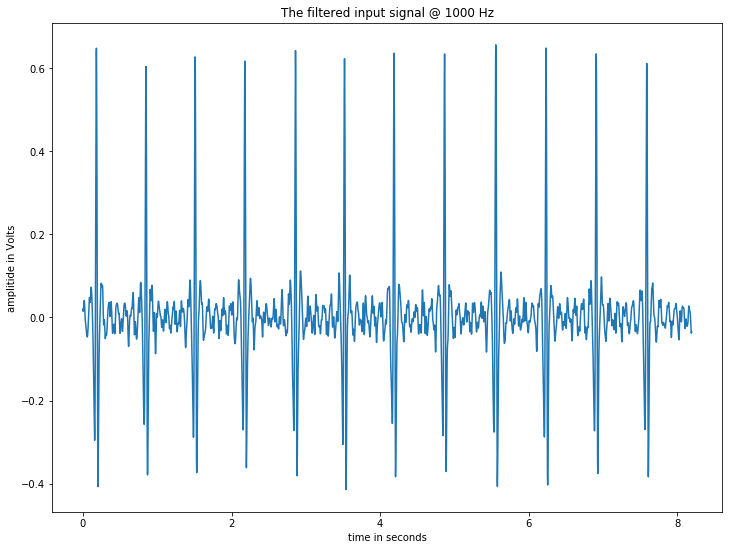

In [3]:
import scipy.fftpack as fft
import numpy as np
import matplotlib.pyplot as plt

#This makes a larger figure
#------------------------------------------------------------------------------
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#------------------------------------------------------------------------------
###############################################################################

#Problem 2
#Using the DFT of the signal in problem 1, filter the signal to remove some of the
#very low frequency components and the very high frequency components beyond the non-zero 
#portion of the PSD. Replot the filtered ECG signal. You should at least see the removal
#of baseline wandering. Try to find roughly optimal low and high frequency cutoffs that preserve
#the basic shape of the ecg but remove unwanted characteristics.

################################################################################
#Solution to problem 2:

N = 8192
file = open('ecg.txt', 'r') #one point per line
sig = np.zeros(N)
i = 0
for lines in file.readlines():
    sig[i] = lines
    i = i + 1
print('8.192 seconds of data sampled at 1000 Hz.')
tme = np.linspace(0.0, (1.0*N)/1000.0, N, False)
dft = fft.fft(sig, n=8192, axis=-1, overwrite_x=False)
freq = fft.fftfreq(8192)
M = 4097
sampling_freq = 1000.0
nyquist_freq = sampling_freq/2.0
psd = np.zeros(M)
for jj in range(M):
    if (jj == 0) or (jj == M-1):
        psd[jj] = (dft.real[jj]*dft.real[jj]+dft.imag[jj]*dft.imag[jj])/N
    else:
        psd[jj] = 2.0*(dft.real[jj]*dft.real[jj]+dft.imag[jj]*dft.imag[jj])/N
fpsd = np.zeros(M)
fpsd[0] = sampling_freq*freq[0]
fpsd[M-1] = -sampling_freq*freq[M-1]
for l in range(1,M-1):
    fpsd[l] = sampling_freq*freq[l]

print('Note that this can cause a warning to be issued by python, but it does not matter.')

print("A low frequency cutoff of 10.0 Hz and a high frequency cutoff of 33.0 Hz work well.")
for m in range(len(dft.real)):
    if abs(sampling_freq*freq[m]) <= 10.0:
         dft.real[m] = 0.0
         dft.imag[m] = 0.0
for mm in range(len(dft.real)):
    if abs(sampling_freq*freq[m]) >= 33.0:
         dft.real[m] = 0.0
         dft.imag[m] = 0.0
filtered_dft = np.zeros(len(dft.real), dtype=complex)
filtered_dft.real = dft.real
filtered_dft.imag = dft.imag
newsig = fft.ifft(filtered_dft, 8192, axis=-1, overwrite_x=False)
#------------------------------------------------------------------------------
plt.title("The filtered input signal @ 1000 Hz")
plt.plot(tme, newsig)
plt.ylabel("amplitide in Volts")
plt.xlabel("time in seconds")
plt.axis('tight')
plt.show()
#------------------------------------------------------------------------------

### Problem 3 Solution:

Number of points used N =  16
Sampling frequency used:  16.0
Nyquist frequency is:  8.0


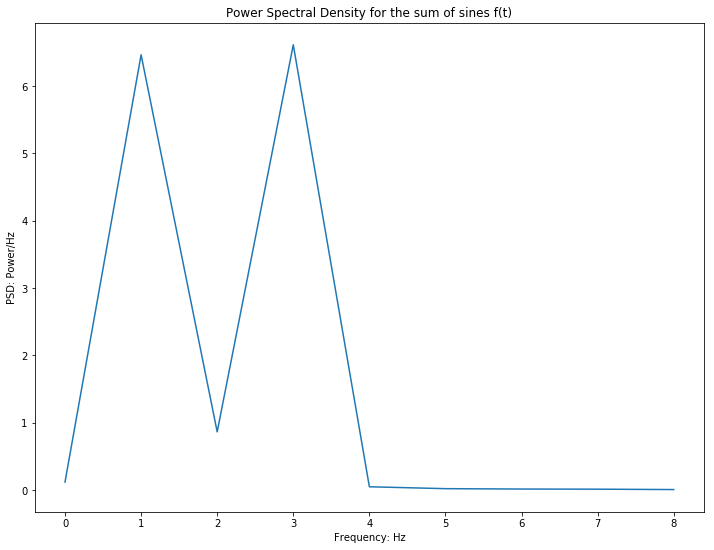

The 2 peaks at omega = 7 and 17 are shown (sin(omega t) where omega = 2pif)
The period of sin(5t) is 2pi/7 => f = 7/2pi = 1.114 Hz
The period if sin(17t) is 2pi/17 => f = 17/2pi = 2.705 Hz

Find the actual freqs of each max of the psd:
Index and frequency of high frequency peak in the psd:  3 3.0
Index and frequency of low frequency peak in the psd:  1 1.0
The freqs of the peaks are close based upon the available choices for the freq.

The amplitudes of the peaks are the same because the coefficients of sin(7x) and
sin(17x) are the same in f(t).


In [4]:
import scipy.fftpack as fft
import numpy as np
import matplotlib.pyplot as plt

#This makes a larger figure
#------------------------------------------------------------------------------
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
#------------------------------------------------------------------------------
###############################################################################

#Problem 3
#Let f(t) = sin(7t)+sin(17t)
#Sample the signal and plot the PSD. Interpret the result.

###############################################################################

#Let the time of the signal be 1 sec
#Let the number of samples be 16
N_ft=16
print('Number of points used N = ', N_ft)
sampling_freq_ft=16.0
print('Sampling frequency used: ', sampling_freq_ft)
#The sampling interval will be 1/16 sec.
#The Nyquist frequency will be (1/1/16)/2 = 8 Hz
nyquist_freq_ft=sampling_freq_ft/2.0
print('Nyquist frequency is: ', nyquist_freq_ft)

t=np.linspace(0,1,16)
ft = np.zeros(16)
for ij in range(16):
    ft[ij]=np.sin(7*t[ij])+np.sin(17*t[ij])

dft_ft = fft.fft(ft, n=16, axis=-1, overwrite_x=False)
freq_ft = fft.fftfreq(16)
M_ft = 9
psd_ft = np.zeros(M_ft)
for jj in range(M_ft):
    if (jj == 0) or (jj == M_ft-1):
        psd_ft[jj] = (dft_ft.real[jj]*dft_ft.real[jj]+dft_ft.imag[jj]*dft_ft.imag[jj])/N_ft
    else:
        psd_ft[jj] = 2.0*(dft_ft.real[jj]*dft_ft.real[jj]+dft_ft.imag[jj]*dft_ft.imag[jj])/N_ft
fpsd_ft = np.zeros(M_ft)
fpsd_ft[0] = sampling_freq_ft*freq_ft[0]
fpsd_ft[M_ft-1] = -sampling_freq_ft*freq_ft[M_ft-1]
for l in range(1,M_ft-1):
    fpsd_ft[l] = sampling_freq_ft*freq_ft[l]
plt.plot(fpsd_ft,psd_ft)
plt.title("Power Spectral Density for the sum of sines f(t)")
plt.ylabel("PSD: Power/Hz")
plt.xlabel("Frequency: Hz")
plt.show()

print('The 2 peaks at omega = 7 and 17 are shown (sin(omega t) where omega = 2pif)')
print('The period of sin(5t) is 2pi/7 => f = 7/2pi = 1.114 Hz')
print('The period if sin(17t) is 2pi/17 => f = 17/2pi = 2.705 Hz\n')
print('Find the actual freqs of each max of the psd:')

maxi = -100000.0
imaxi = -1
for ijk in range(len(psd_ft)):
    if(psd_ft[ijk]>maxi):
        maxi = psd_ft[ijk]
        imaxi = ijk
print('Index and frequency of high frequency peak in the psd: ', imaxi, fpsd_ft[imaxi])
#imaxi = 3, freq = 3.0

maxi = -100000.0
imaxi = -1
for ijk in range(len(psd_ft)):
    if(ijk < 3):
        if(psd_ft[ijk]>maxi):
            maxi = psd_ft[ijk]
            imaxi = ijk
print('Index and frequency of low frequency peak in the psd: ', imaxi, fpsd_ft[imaxi])
#imaxi = 1, freq = 1.0 Hz
print('The freqs of the peaks are close based upon the available choices for the freq.\n')
print('The amplitudes of the peaks are the same because the coefficients of sin(7x) and')
print('sin(17x) are the same in f(t).')